## Concepts formels

In [24]:
from pathlib import Path
import sys

%load_ext autoreload
%autoreload 2

PROJ = Path("/Users/monicasen/PycharmProjects/topic-modeling")
sys.path.insert(0, str(PROJ))

from src.crea.fca.concept import lattice_to_table

df_concepts = lattice_to_table(context)
display(df_concepts.head())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,attributes (extent),objects (intent),n_attributes,n_objects
concept_id,,,,
0,,"2010-BATI, 2010-BPM, 2010-GRN, 2011-RDN, 2011-...",0,40
1,Adaptive,"2013-KPR, 2014-RKPLG",1,2
2,BPM,"2012-R, 2016-KRLG, 2019-BRLG",1,3
3,Business process modeling,"2011-RDN, 2013-RKPLG, 2016-Dall",1,3
4,Case Management,"2010-BPM, 2011-RDN, 2012-R, 2013-KPR, 2013-R",1,5


#### Concept formel où : au moins 2 termes apparaissent, dans au moins 2 documents

In [9]:
for i, c in enumerate(context.lattice):
    if len(c.extent) >= 3 and len(c.intent) >= 4:
        print(f"Concept {i}")
        print(f"  Entites : {c.extent}") # Extents = Objects = Entities
        print(f"  Documents  : {c.intent}") # Intents = Attributes = Documents
        print()

Concept 184
  Entites : ('Decentralised', 'change', 'management')
  Documents  : ('2013-SRZN', '2014-ZRS', '2014-ZRSa', '2016-BRZ')



In [123]:
import pandas as pd

BIN_MATRIX = "/Users/monicasen/PycharmProjects/topic-modeling/datasets/rychkova_papers/matrix/abstract_6/abstract_6_binarized.csv"
df = pd.read_csv(BIN_MATRIX, sep=';', index_col=0)

print(df.loc[['Organizational', 'trustworthiness'],['2023-RG', '2024-RR']])

                 2023-RG  2024-RR
word                             
Organizational         0        0
trustworthiness        0        1


![Sample abstracts](../data/rr_rg.png)

## Similarite conceptuelle entre objets

In [29]:
%reload_ext autoreload

from src.crea.fca.similarity import *
    
sim_matrix = compute_conceptual_similarity_matrix(context)

# Exemple de preview
sim_matrix.round(2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,20th century,AI,AI assistants,Abstract,Adaptive,Alloy,Alloy Analyzer,Appreciative System,Approval,ArchiMate,...,usually,validate,validated,validation,video games,visualisation,visualized,volunteers,workflow,working on
20th century,1.00,0.33,0.33,0.33,0.50,0.20,0.20,0.20,0.33,0.33,...,0.14,0.33,0.33,0.33,0.33,0.20,0.33,0.33,0.33,1.00
AI,0.33,1.00,1.00,0.33,0.20,0.20,0.20,0.20,0.33,0.33,...,0.14,0.33,0.33,0.33,0.33,0.20,0.33,0.33,0.33,0.33
AI assistants,0.33,1.00,1.00,0.33,0.20,0.20,0.20,0.20,0.33,0.33,...,0.14,0.33,0.33,0.33,0.33,0.20,0.33,0.33,0.33,0.33
Abstract,0.33,0.33,0.33,1.00,0.20,0.50,0.50,0.20,0.33,0.33,...,0.14,0.33,0.33,0.33,0.33,0.20,1.00,0.33,0.33,0.33
Adaptive,0.50,0.20,0.20,0.20,1.00,0.14,0.14,0.14,0.20,0.20,...,0.11,0.20,0.20,0.20,0.20,0.14,0.20,0.20,0.20,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visualisation,0.20,0.20,0.20,0.20,0.14,0.14,0.14,0.14,0.20,0.20,...,0.25,0.20,0.20,0.20,0.20,1.00,0.20,0.20,0.20,0.20
visualized,0.33,0.33,0.33,1.00,0.20,0.50,0.50,0.20,0.33,0.33,...,0.14,0.33,0.33,0.33,0.33,0.20,1.00,0.33,0.33,0.33
volunteers,0.33,0.33,0.33,0.33,0.20,0.20,0.20,0.20,0.33,0.33,...,0.14,0.33,0.33,0.33,0.33,0.20,0.33,1.00,0.33,0.33
workflow,0.33,0.33,0.33,0.33,0.20,0.20,0.20,0.20,0.33,0.33,...,0.14,0.33,0.33,0.33,0.33,0.20,0.33,0.33,1.00,0.33


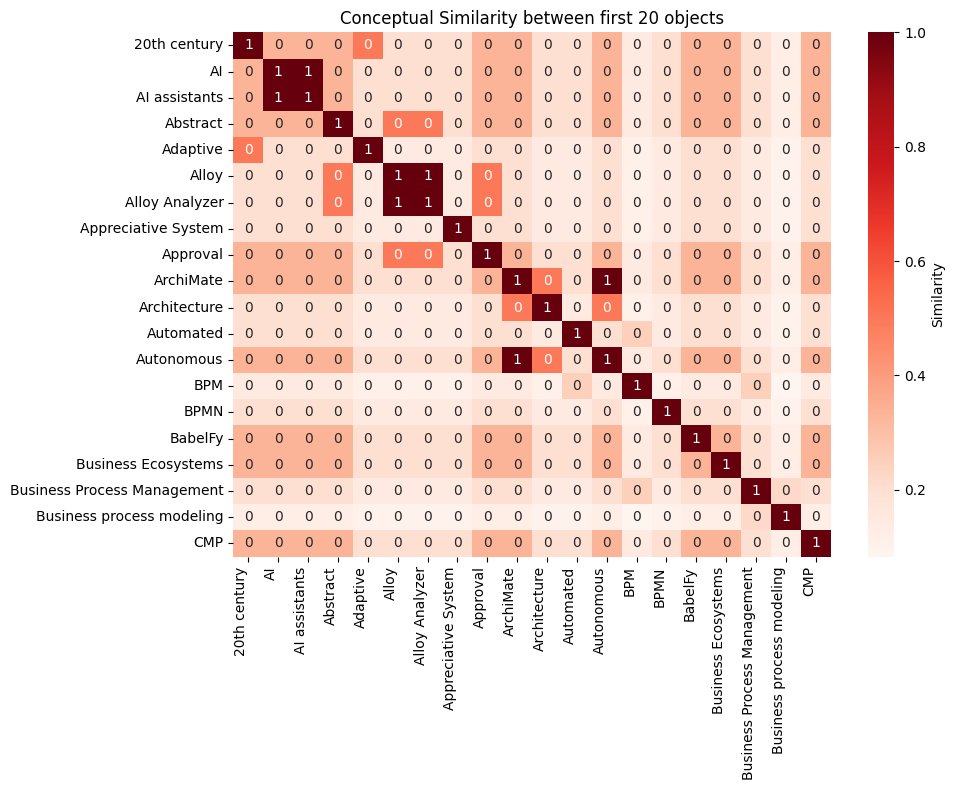

In [38]:
%reload_ext autoreload
from src.crea.fca.similarity import *

top_n = 20
subset = sim_matrix.iloc[:top_n, :top_n]
plot_heatmap(subset,
             title=f"Conceptual Similarity between first {top_n} objects",
             cbar_label="Similarity")

## Mutual Impact

In [36]:
%reload_ext autoreload
from src.crea.fca.similarity import *

impact_df = compute_mutual_impact_matrix(context)
impact_df.head(10)

object,20th century,AI,AI assistants,Abstract,Adaptive,Alloy,Alloy Analyzer,Appreciative System,Approval,ArchiMate,...,usually,validate,validated,validation,video games,visualisation,visualized,volunteers,workflow,working on
attribute,,,,,,,,,,,,,,,,,,,,,
2010-BATI,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-BPM,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-GRN,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,...,0.0645,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-RDN,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-RN,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-R,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-BBRWa,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-BBRWb,0.0,0.0,0.0,0.1,0.0000,0.1818,0.1818,0.0,0.0000,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
2013-KPR,0.0,0.0,0.0,0.0,0.1333,0.0000,0.0000,0.0,0.0000,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


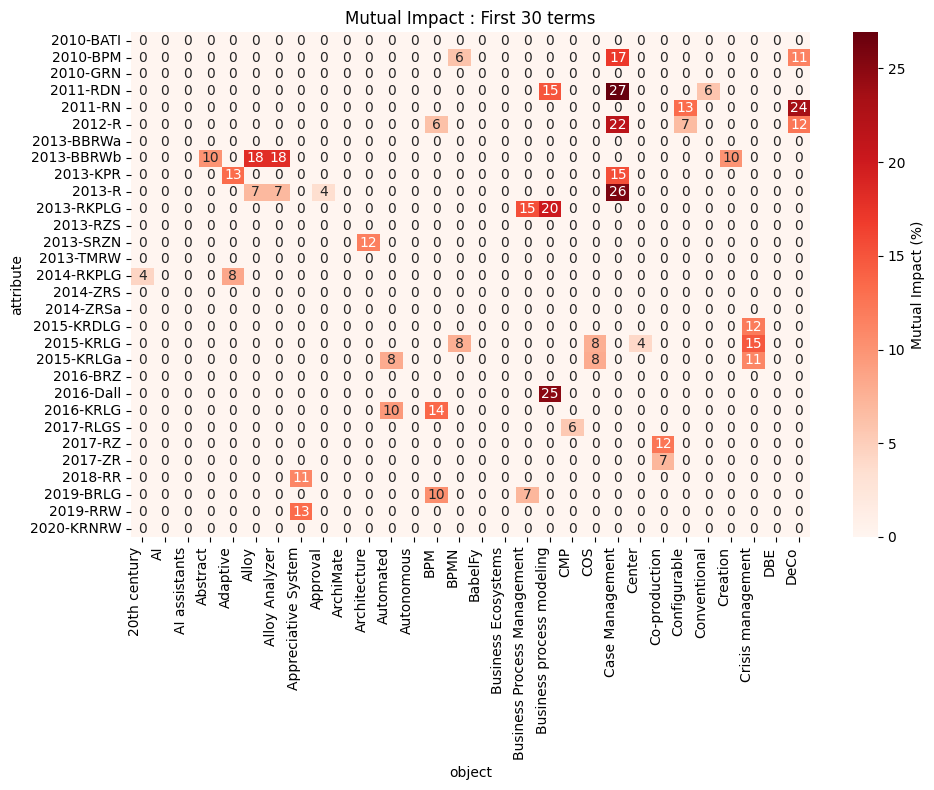

In [40]:
top_n = 30
subset = impact_df.iloc[:top_n, :top_n]

plot_heatmap(matrix=subset,
             title=f"Mutual Impact : First {top_n} terms",
             cbar_label="Mutual Impact (%)",
             as_percent=True)

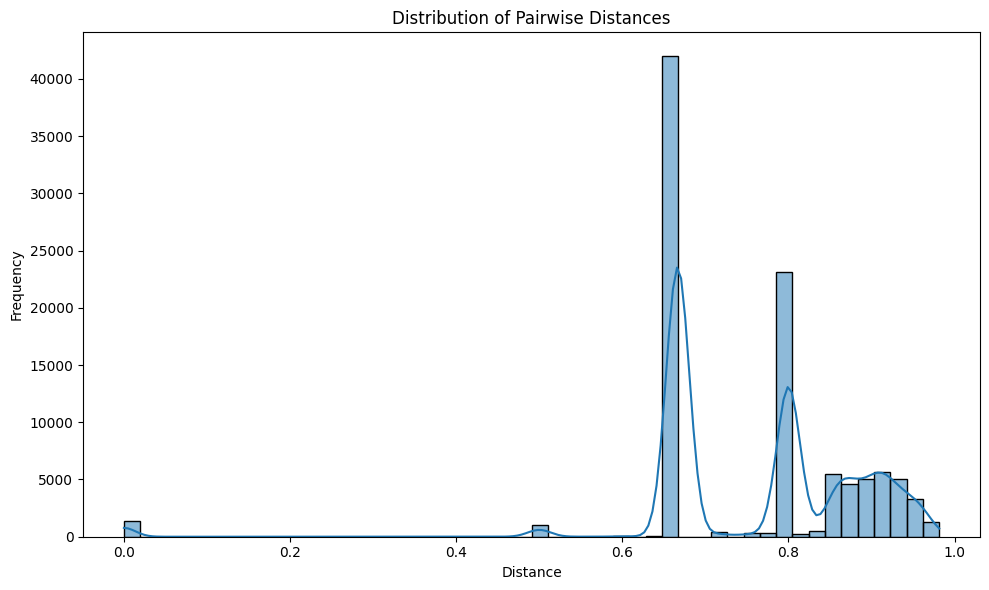

array([0.66666667, 0.66666667, 0.66666667, ..., 0.66666667, 0.66666667,
       0.66666667])

In [77]:
%reload_ext autoreload
from src.crea.fca.plot import *

plot_distance_distribution(sim_matrix)

## Hierarchical Agglomerative Clustering (HAC)

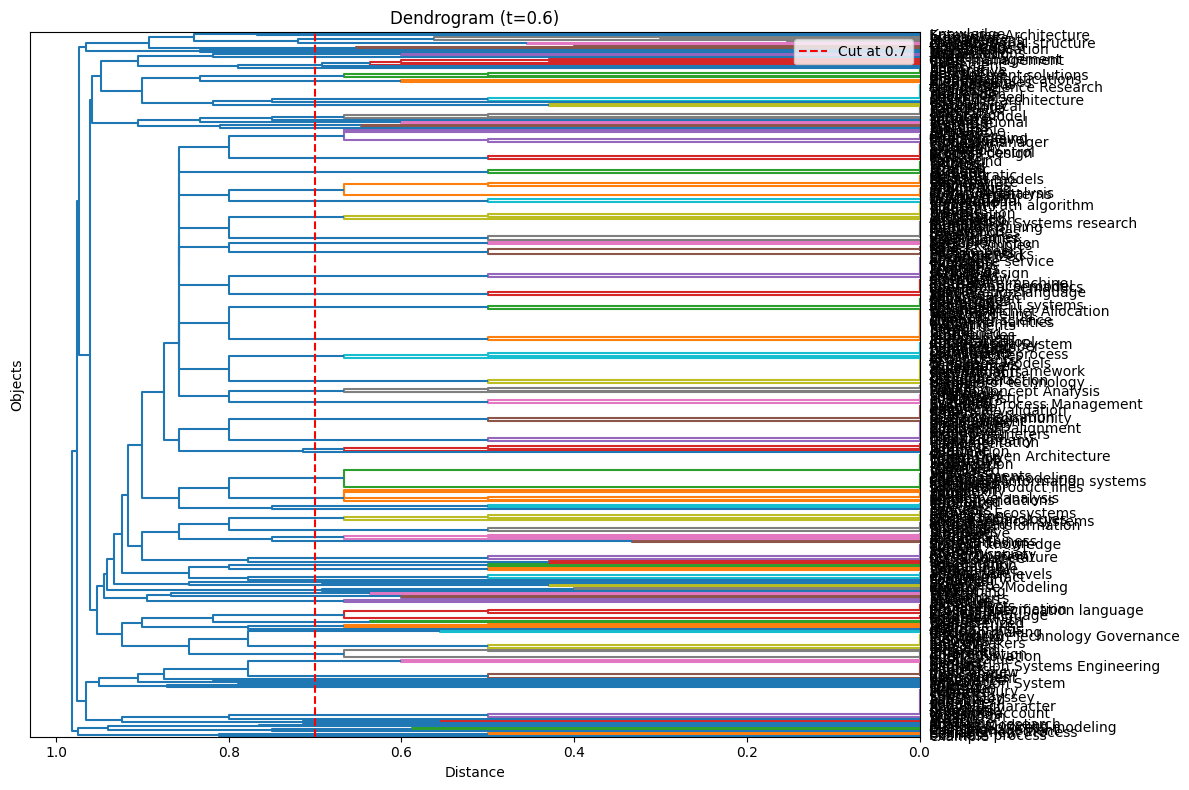

In [78]:
%reload_ext autoreload
from src.crea.fca.plot import *

# Z, clusters_k, labels = compute_clusters_from_similarity(sim_matrix, n_clusters=8)
# plot_dendrogram(Z, labels, title="Dendrogram (k=8)", threshold=None)

# clusters based on cut distance
Z, clusters_t, labels = compute_clusters_from_similarity(sim_matrix, threshold=0.7)
plot_dendrogram(Z, labels, title="Dendrogram (t=0.6)", threshold=0.7)

In [80]:
%reload_ext autoreload
from src.crea.fca.plot import *

pd.set_option('display.max_colwidth', None)

df_clusters = clusters_to_df(clusters_t)
display(df_clusters)

,cluster_id,n_terms,terms
0,45,23,"MDA, Model Driven Architecture, SysML, advancements, analysis, bottom-up, component modeling, consistently, constraint, enterprise information systems, fulfillment, illustrative, integration, limits, propagation, redesign, reflected, software product lines, specified, tech, translated, validated, validation"
1,54,20,"BabelFy, Latent Dirichlet Allocation, Topic modeling, analyzing, cleaned, close, computer science, digital humanities, evolving, experiments, formal, importance, main, offers, output, positioned, probabilities, profits, replacement, texts"
2,9,19,"20th century, HAL 9000, Humans, IMDB, Kubrick, Space Odyssey, automated, capable, computer, day, fiction, fictional character, objectively, pragmatic, reality, scientists, take into account, thousands, working on"
3,52,16,"AI, AI assistants, Language Models, Transformers, acceptance, aspects, awareness, behavior, conceptual framework, determinants, human, popular, previous, respondents, social interaction, theories of technology"
4,63,15,"New, SCM, bureaucratic, business models, classical, demonstrate, efficient, engineering, explicitly, immutable, literature analysis, software patterns, supply chain, taxonomies, trustworthy"
...,...,...,...
82,80,1,discuss
83,81,1,Organisations
84,82,1,Technology
85,86,1,Enterprise Architecture


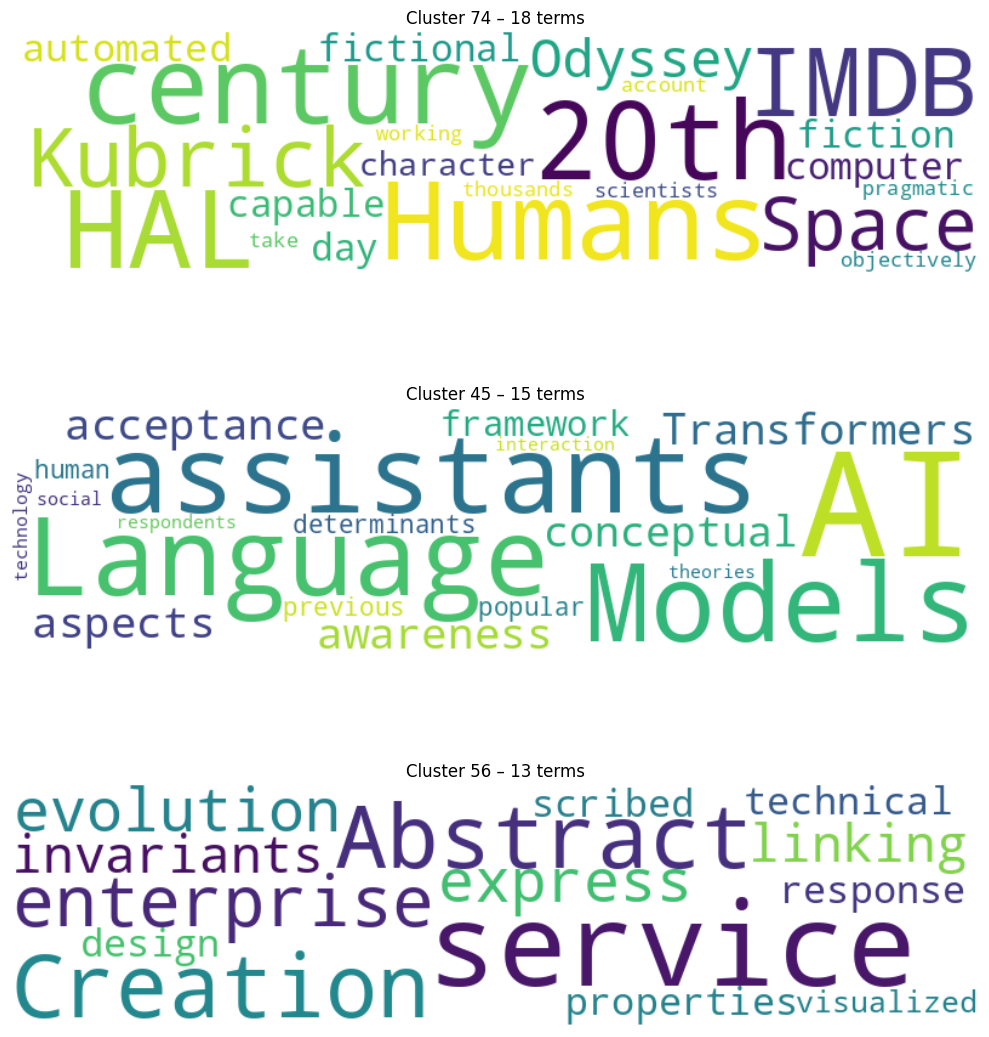

In [63]:
%reload_ext autoreload
from src.crea.fca.plot import *

plot_wordclouds_from_clusters(clusters, max_clusters=3, cluster_order=[74, 45, 56])